# BIAS

BIAS IS THE CRACKS OR DEFECTS IN THE USED DETECTOR. THEY APPEAR AS LINES OR BROKEN PARTS. EVENTHOUGH, THE BIAS IMAGES IN THIS FILE DOESN'T SHOW DEFECTIONS, WHICH IS A PROOF OF THE DETECTOR EFFECIENCY. EXPOSURE TIME OF THE IMAGE WON'T AFFECT THE BIAS, it is only one shot.

THERE MIGHT BE DEFECTIONS THAT WE CAN'T SEE "NANO SCALE" (NANO TECHNOLOGY).

MEASURE THEM ONCE WHEN THE SHUTTER IS CLOSED AND SUBSTRACT THEM OUT OF THE GALAXY IMAGE.

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import glob

path_bias = "Bicocca-Tele.data/ngc_6946_for_29th_Sep_2025/BIAS"

In [2]:
with fits.open(path_bias +"/2025-09-25_16-23-54_BIAS__0000.fits") as hdu_bias:
  # hdu_bias.info()
  # print(hdu_bias)
  image_data_bias = hdu_bias[0].data

file_bias = sorted(glob.glob(path_bias +"/2025-09-25_*.fits"))
data_bias = np.array([fits.getdata(f) for f in file_bias])
master_bias = np.median(data_bias, axis=0)           # The data here are reported in ADUs (Analog to digital unit)

# Create a PrimaryHDU object from the master_bias data (Create a FITS file)
hdu_bias = fits.PrimaryHDU(master_bias)
#HDUList object(Make a list file)
hdu_list_bias = fits.HDUList([hdu_bias])
#FITS file
hdu_list_bias.writeto(path_bias + "/master_bias.fits", overwrite=True)

print( "The bias matrix shape = ", np.shape(data_bias))

The bias matrix shape =  (15, 3194, 4788)


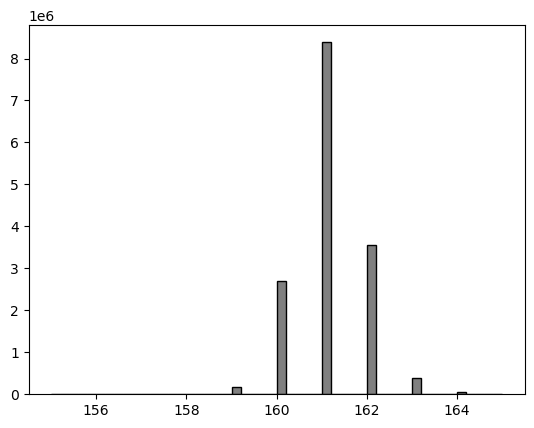

In [10]:
# Histogram can be used to show the values that we have.
plt.hist(master_bias.flatten(), bins=50 , color= 'grey', edgecolor='black', range=(155,165))
plt.show()

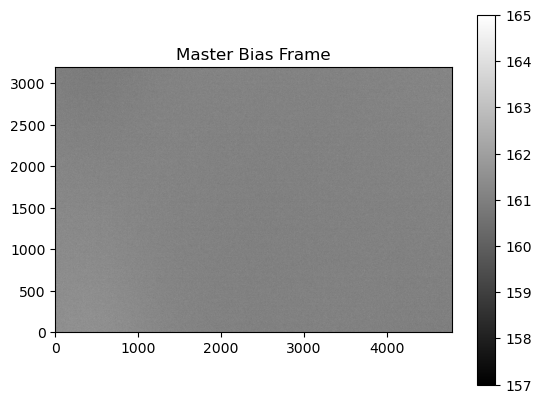

In [13]:
# The plot code
plt.imshow(master_bias,cmap='gray', clim = (157,165), origin= 'lower') # The maximum and minimum values on the color bar are 130-200. 
plt.colorbar()
plt.title('Master Bias Frame')
plt.show()

In [14]:
hdu_bias.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4788                                                  
NAXIS2  =                 3194                                                  
EXTEND  =                    T                                                  